In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd

In [ ]:
from sklearn.cluster import KMeans

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [ ]:
df = pd.read_csv("./breast-cancer.csv")

# Exploratory Data Analysis

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

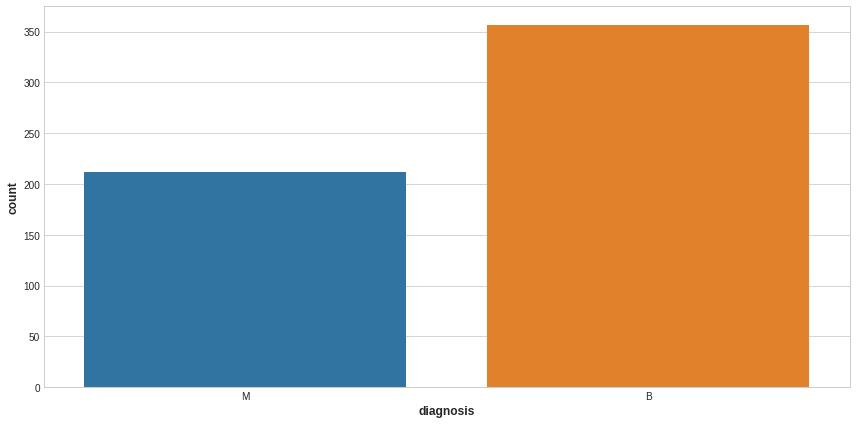

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='diagnosis', data=df)

In [ ]:
df = df.drop(columns=['id'])
CMAP='CMRmap'

In [ ]:
df.describe().T.style.background_gradient(cmap='CMRmap')

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [ ]:
#check missing value
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].replace("M", 0)
df['diagnosis'] = df['diagnosis'].replace("B", 1)

In [ ]:
#See Correlation Between Feature
df.corr().style.background_gradient(cmap = CMAP)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838,-0.567134,0.008303,-0.556141,-0.548236,0.067016,-0.292999,-0.253730,-0.408042,0.006522,-0.077972,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df['diagnosis'] = df['diagnosis'].replace(0, "M")
df['diagnosis'] = df['diagnosis'].replace(1, "B")

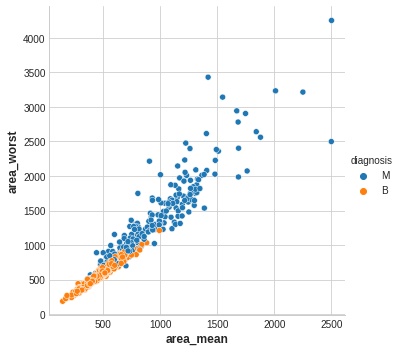

In [ ]:
sns.relplot(x="area_mean", y="area_worst", hue='diagnosis', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


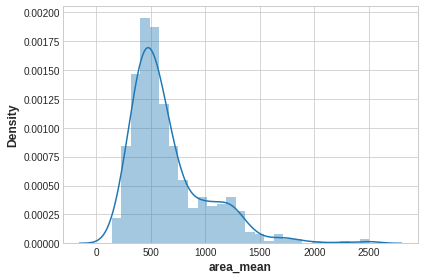

In [ ]:
sns.distplot(df['area_mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


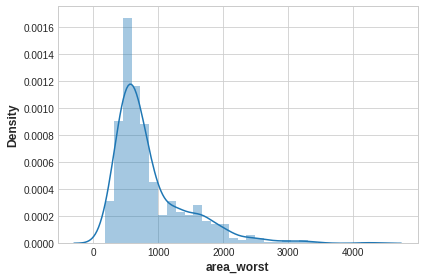

In [ ]:
sns.distplot(df['area_worst'])

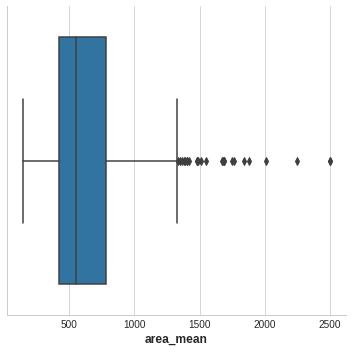

In [ ]:
sns.catplot(x='area_mean', kind='box', data=df)

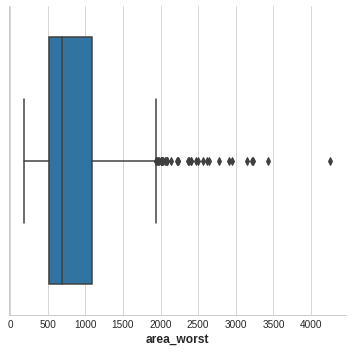

In [ ]:
sns.catplot(x='area_worst', kind='box', data=df)

#Data Preprocessing

In [ ]:
#Check Duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


# Data Manipulation

In [ ]:
#scaler = MinMaxScaler(feature_range = (0 , 1))

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# # Label encoding for categoricals
# for colname in X.select_dtypes("object"):
#     X[colname], _ = X[colname].factorize()

# list discrete features that have integer dtypes for using MI (Mutual Information)
discrete_features = X.dtypes == int

# Feature Selection

In [ ]:
#use mutual information classify to select mutual feature
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

perimeter_worst            0.476492
area_worst                 0.464118
radius_worst               0.453321
concave points_mean        0.439054
concave points_worst       0.438144
perimeter_mean             0.403250
concavity_mean             0.374912
radius_mean                0.368837
area_mean                  0.361553
area_se                    0.340222
concavity_worst            0.316013
perimeter_se               0.273353
radius_se                  0.247381
compactness_worst          0.224889
compactness_mean           0.213349
concave points_se          0.128878
texture_worst              0.125204
concavity_se               0.117891
smoothness_worst           0.098540
symmetry_worst             0.097080
texture_mean               0.094449
smoothness_mean            0.083825
compactness_se             0.073369
fractal_dimension_worst    0.069027
symmetry_mean              0.059884
fractal_dimension_se       0.041314
smoothness_se              0.016216
symmetry_se                0

In [ ]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0]

X = drop_uninformative(X, mi_scores)

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Model Building

1.   List item
2.   List item



# 1.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc

decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.95      0.92      0.93       357
           M       0.87      0.91      0.89       212

    accuracy                           0.92       569
   macro avg       0.91      0.92      0.91       569
weighted avg       0.92      0.92      0.92       569



# 2.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.97      0.98      0.97       357
           M       0.96      0.94      0.95       212

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



# 3.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.93      0.96      0.94       357
           M       0.93      0.87      0.90       212

    accuracy                           0.93       569
   macro avg       0.93      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



# 4.SVC

In [ ]:
from sklearn.svm import SVC

scv = SVC(degree=5,kernel="rbf",C=1.5)
scv.fit(X,y)
predict = cross_val_predict(estimator = scv, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.90      0.98      0.94       357
           M       0.96      0.83      0.89       212

    accuracy                           0.92       569
   macro avg       0.93      0.90      0.91       569
weighted avg       0.92      0.92      0.92       569



# 5.Gaussian Naive Base

In [ ]:
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           B       0.94      0.97      0.95       357
           M       0.94      0.89      0.91       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



# 6.XGBoost

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))


Classification Report: 
               precision    recall  f1-score   support

           B       0.94      0.97      0.95       357
           M       0.94      0.89      0.91       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569

